In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import astropy.constants as cnst
import astropy.units as u
from scipy import stats

In [13]:
data = pd.read_csv("E:/Projects/hubble_constant_project/hubble_const_data/type_1a_data/Type-Ia-Supernova-Data.csv")

The dataset consists of Type 1a SNE's with a wide range of redshift values, minimum being z= 0.01 to maximum z= 1.3

First we will find the Hubble Constant Estimate for the whole unbinned dataset

Hubble Constant value is: 44.82614072968303 km/s/Mpc


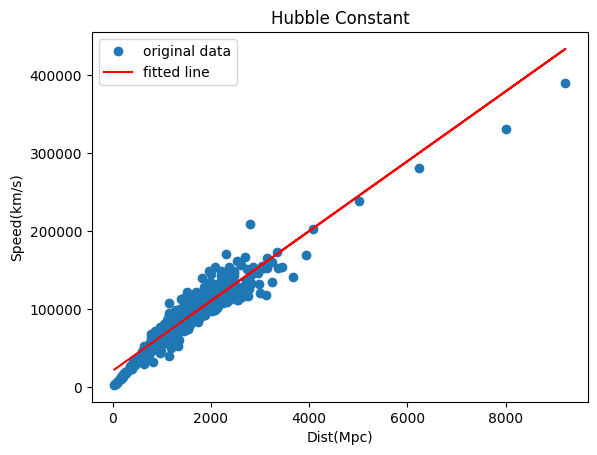

In [14]:
import astropy.units

z = data["z(redshift)"]
mu = data["mu (distance modulus)"]
dist_pc = 10**(1+ mu/5)    #distance in parsec
dist_mpc =  dist_pc/1e6             #distance in megaparsec
v = (cnst.c.to(u.km/ u.second) ) * z    # as v= c*z

result = stats.linregress(dist_mpc, v)   #linear fit of data
print(f"Hubble Constant value is: {result.slope} km/s/Mpc")

plt.plot(dist_mpc, v, 'o', label='original data')
plt.plot(dist_mpc, result.intercept + result.slope*dist_mpc, 'r', label='fitted line')
plt.title("Hubble Constant")
plt.xlabel("Dist(Mpc)")
plt.ylabel("Speed(km/s)")
plt.legend()

This Hubble Constant Value is nowhere near the expected value of 69~74 km/s/Mpc. The high redshift data points skew the slope. Binned dataset can provide a clear idea.

In [15]:
z_values_list = [0.4,0.3,0.2,0.1,0.09,0.07,0.05]

Hubble Constant value for z< 0.4 is: 48.5575840725895 ± 0.6784213123646641 km/s/Mpc
95% Confidence Interval for H0: 48.5575840725895 ± 1.3321094817987496 km/s/Mpc


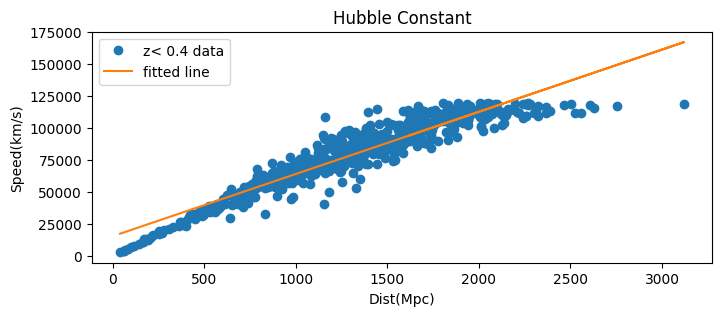

Hubble Constant value for z< 0.3 is: 53.31035489526506 ± 0.9116150828419128 km/s/Mpc
95% Confidence Interval for H0: 53.31035489526506 ± 1.7920097920980962 km/s/Mpc


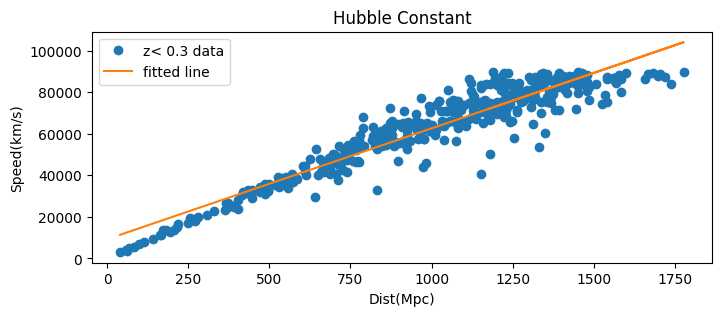

Hubble Constant value for z< 0.2 is: 53.287469083079685 ± 1.7957181224332526 km/s/Mpc
95% Confidence Interval for H0: 53.287469083079685 ± 3.5463665213025175 km/s/Mpc


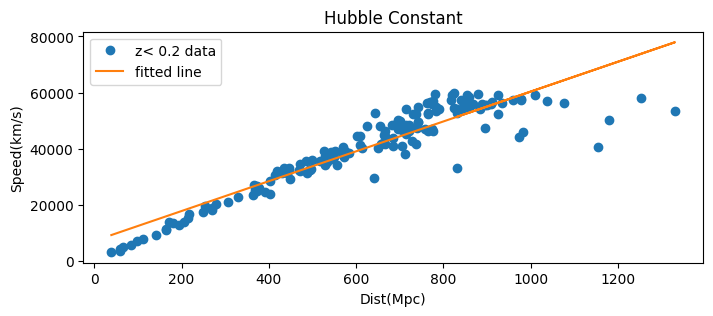

Hubble Constant value for z< 0.1 is: 57.58848990036208 ± 2.927100210821654 km/s/Mpc
95% Confidence Interval for H0: 57.58848990036208 ± 5.962308019071719 km/s/Mpc


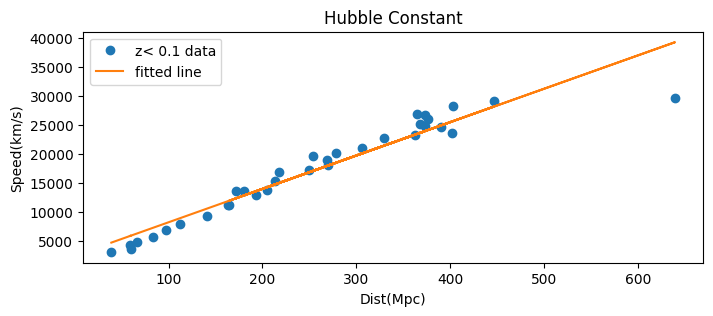

Hubble Constant value for z< 0.09 is: 65.9352827368678 ± 1.905329631971196 km/s/Mpc
95% Confidence Interval for H0: 65.9352827368678 ± 3.896836641341284 km/s/Mpc


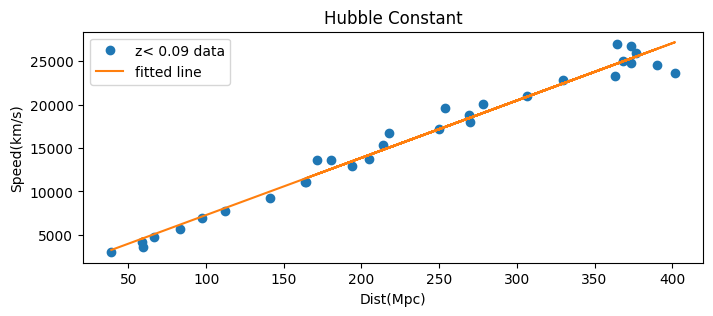

Hubble Constant value for z< 0.07 is: 71.79906085135919 ± 2.2746513375090704 km/s/Mpc
95% Confidence Interval for H0: 71.79906085135919 ± 4.760899964798413 km/s/Mpc


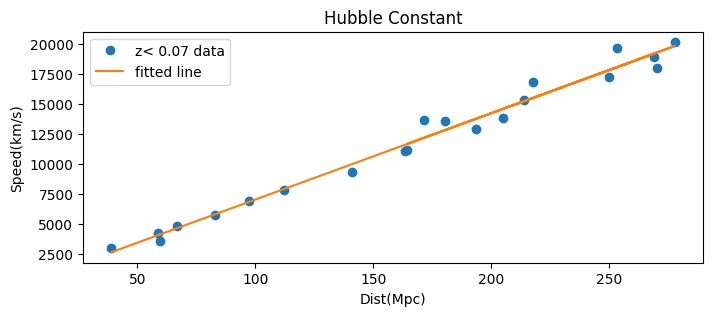

Hubble Constant value for z< 0.05 is: 69.96250520541032 ± 3.2690849762433722 km/s/Mpc
95% Confidence Interval for H0: 69.96250520541032 ± 7.122724287498989 km/s/Mpc


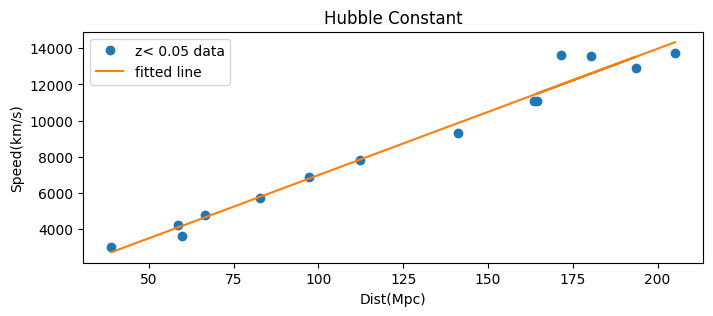

In [16]:
# Binning of the data

for i in z_values_list:
    z_data = data[data["z(redshift)"] < i]
    z = z_data["z(redshift)"]
    mu = z_data["mu (distance modulus)"]

    dist_pc = 10**(1 + mu / 5)
    dist_mpc = dist_pc / 1e6
    v = (cnst.c.to(u.km / u.s).value) * z

    result = stats.linregress(dist_mpc, v)
    print(f"Hubble Constant value for z< {i} is: {result.slope} ± {result.stderr} km/s/Mpc")

    confidence_level = 0.95               # confidence interval 
    degrees_freedom = len(dist_mpc) - 2  
    t_statistic = stats.t.ppf((1 + confidence_level) / 2, degrees_freedom)
    slope_conf_interval = t_statistic * result.stderr
    print(f"95% Confidence Interval for H0: {result.slope} ± {slope_conf_interval} km/s/Mpc")

    plt.figure(figsize=(8,3))
    plt.plot(dist_mpc, v, 'o', label=f'z< {i} data')
    plt.plot(dist_mpc, result.intercept + result.slope*dist_mpc, label='fitted line')
    plt.title("Hubble Constant")
    plt.xlabel("Dist(Mpc)")
    plt.ylabel("Speed(km/s)")
    plt.legend()
    plt.show()


The binned data shows that the outliers with z > 0.1 had higher weight in the result, despite the low frequency of datapoints.


Low redshift SN's, approximately in the 500 Mpc range exhibit a linear relationship with least skewness in the slope. 

This suggests the linear approximation of Hubble constant is limited to lower redshifts only.